In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import packages
import os
import shutil

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from matplotlib import pyplot as plt
from random import shuffle

Separate cats and dogs images in separate folders

In [3]:
# Separate cats and dogs images in separate folders


src = "F:\\rohan\\appliedaicourse\\Github\\Kaggle_cats_vs_dogs\\data\\train\\"
dst_cat = "F:\\rohan\\appliedaicourse\\Github\\Kaggle_cats_vs_dogs\\data\\train\\cat\\"
dst_dog = "F:\\rohan\\appliedaicourse\\Github\\Kaggle_cats_vs_dogs\\data\\train\\dog\\"


In [4]:
'''
def move_files(src, dst, category):
    files = [f for f in os.listdir(src) if f.startswith(category) and os.path.isfile(os.path.join(src,f))]
    for f in files:
        shutil.move(os.path.join(src,f), dst)

move_files(src=src, dst=dst_dog, category="dog")
move_files(src=src, dst=dst_cat, category="cat")

'''

'\ndef move_files(src, dst, category):\n    files = [f for f in os.listdir(src) if f.startswith(category) and os.path.isfile(os.path.join(src,f))]\n    for f in files:\n        shutil.move(os.path.join(src,f), dst)\n\nmove_files(src=src, dst=dst_dog, category="dog")\nmove_files(src=src, dst=dst_cat, category="cat")\n\n'

In [5]:
'''

# split files
def split_files(src, dst, val_split):
    files = [f for f in os.listdir(src) if os.path.isfile(os.path.join(src,f))]
    shuffle(files)
    val_count = val_split * len(files)
    for f in files:
        shutil.move(os.path.join(src,f), dst)
        val_count-=1
        if val_count <= 0:
            break
            
'''

'\n\n# split files\ndef split_files(src, dst, val_split):\n    files = [f for f in os.listdir(src) if os.path.isfile(os.path.join(src,f))]\n    shuffle(files)\n    val_count = val_split * len(files)\n    for f in files:\n        shutil.move(os.path.join(src,f), dst)\n        val_count-=1\n        if val_count <= 0:\n            break\n            \n'

In [6]:
'''
split_files(src="F:\\rohan\\appliedaicourse\\Github\\Kaggle_cats_vs_dogs\\data\\train\\cat\\", 
            dst="F:\\rohan\\appliedaicourse\\Github\\Kaggle_cats_vs_dogs\\data\\validate\\cat\\", 
            val_split=0.2)

split_files(src="F:\\rohan\\appliedaicourse\\Github\\Kaggle_cats_vs_dogs\\data\\train\\dog\\", 
            dst="F:\\rohan\\appliedaicourse\\Github\\Kaggle_cats_vs_dogs\\data\\validate\\dog\\", 
            val_split=0.2)
'''

'\nsplit_files(src="F:\\rohan\\appliedaicourse\\Github\\Kaggle_cats_vs_dogs\\data\\train\\cat\\", \n            dst="F:\\rohan\\appliedaicourse\\Github\\Kaggle_cats_vs_dogs\\data\\validate\\cat\\", \n            val_split=0.2)\n\nsplit_files(src="F:\\rohan\\appliedaicourse\\Github\\Kaggle_cats_vs_dogs\\data\\train\\dog\\", \n            dst="F:\\rohan\\appliedaicourse\\Github\\Kaggle_cats_vs_dogs\\data\\validate\\dog\\", \n            val_split=0.2)\n'

In [7]:
# prepare the model

model1 = Sequential([
    Conv2D(16, (3,3), activation="relu", input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
#     Conv2D(128, (3,3), activation='relu'),
#     MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
]
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
model1.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
train_dir = "F:\\rohan\\appliedaicourse\\Github\\Kaggle_cats_vs_dogs\\data\\train\\"
val_dir = "F:\\rohan\\appliedaicourse\\Github\\Kaggle_cats_vs_dogs\\data\\validate\\"

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validate_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
)

# housing.com, nobroker, flat and flatmates-facebook
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=128,
    class_mode='binary'
)

validate_generator = validate_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=128,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [10]:
EPOCHS = 100

In [11]:
history = model1.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=EPOCHS,
    verbose=1,
    validation_data=validate_generator,
    validation_steps=8
)

Epoch 1/100
8/8 [==============================] - 88s 11s/step - loss: 0.6985 - acc: 0.5010 - val_loss: 0.6938 - val_acc: 0.4727
Epoch 2/100
8/8 [==============================] - 51s 6s/step - loss: 0.6926 - acc: 0.5156 - val_loss: 0.6923 - val_acc: 0.5264
Epoch 3/100
8/8 [==============================] - 31s 4s/step - loss: 0.6927 - acc: 0.5078 - val_loss: 0.6914 - val_acc: 0.5264
Epoch 4/100
8/8 [==============================] - 51s 6s/step - loss: 0.6930 - acc: 0.5049 - val_loss: 0.6929 - val_acc: 0.4893
Epoch 5/100
8/8 [==============================] - 63s 8s/step - loss: 0.6914 - acc: 0.5205 - val_loss: 0.6910 - val_acc: 0.5400
Epoch 6/100
8/8 [==============================] - 57s 7s/step - loss: 0.6974 - acc: 0.5293 - val_loss: 0.6920 - val_acc: 0.5264
Epoch 7/100
8/8 [==============================] - 52s 6s/step - loss: 0.6930 - acc: 0.4961 - val_loss: 0.6923 - val_acc: 0.5498
Epoch 8/100
8/8 [==============================] - 49s 6s/step - loss: 0.6913 - acc: 0.5117 - va

8/8 [==============================] - 29s 4s/step - loss: 0.5884 - acc: 0.6934 - val_loss: 0.5740 - val_acc: 0.7227
Epoch 65/100
8/8 [==============================] - 31s 4s/step - loss: 0.5790 - acc: 0.7080 - val_loss: 0.5702 - val_acc: 0.7295
Epoch 66/100
8/8 [==============================] - 34s 4s/step - loss: 0.5914 - acc: 0.6777 - val_loss: 0.5437 - val_acc: 0.7373
Epoch 67/100
8/8 [==============================] - 32s 4s/step - loss: 0.5549 - acc: 0.7061 - val_loss: 0.5482 - val_acc: 0.7305
Epoch 68/100
8/8 [==============================] - 32s 4s/step - loss: 0.5725 - acc: 0.7021 - val_loss: 0.5474 - val_acc: 0.7363
Epoch 69/100
8/8 [==============================] - 31s 4s/step - loss: 0.5717 - acc: 0.7197 - val_loss: 0.5373 - val_acc: 0.7480
Epoch 70/100
8/8 [==============================] - 29s 4s/step - loss: 0.5591 - acc: 0.7188 - val_loss: 0.5333 - val_acc: 0.7334
Epoch 71/100
8/8 [==============================] - 28s 3s/step - loss: 0.5802 - acc: 0.6875 - val_loss

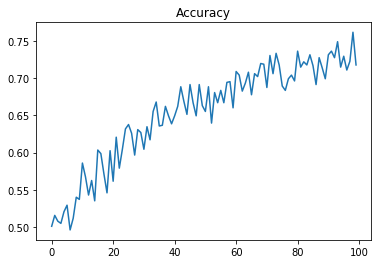

In [12]:
# plot loss and accuracy

acc = history.history['acc']
loss = history.history['loss']

epochs = range(EPOCHS)

plt.plot(epochs, acc)
plt.title("Accuracy")
plt.show()

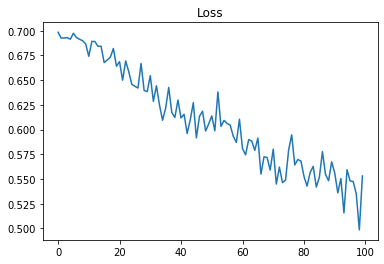

In [13]:
plt.plot(epochs, loss)
plt.title("Loss")
plt.show()